<a href="https://colab.research.google.com/github/aruaru0/bert-regression-test/blob/main/transformers_japanese_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformersのテスト

## install packages

In [1]:
# インストール後、ランタイムを再起動する必要あり！！
!pip install transformers
!pip install datasets
!pip install evaluate
# pip install　accelerate -U などでインストールすると再起動が必要となる
!pip install git+https://github.com/huggingface/accelerate

  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-cqcsni1f
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-cqcsni1f
  Resolved https://github.com/huggingface/accelerate to commit 4a1d5b1fb651c1c408c39f9ddaab37c54cd878ba
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
# 日本語関係
!pip install fugashi
!pip install ipadic
!pip install unidic-lite  # for bert-large-japanese

## データをロード（amazonのレビューデータ）

In [1]:
from datasets import load_dataset

In [2]:
#https://huggingface.co/datasets/amazon_reviews_multi
dataset = load_dataset("amazon_reviews_multi", "ja")

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
})

### pandasに変換する場合

In [4]:
dataset.set_format(type="pandas")
train_df = dataset["train"][:]
train_df.head(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,ja_0388536,product_ja_0270003,reviewer_ja_0454098,1,普段使いとバイクに乗るときのブーツ兼用として購入しました。見た目や履き心地は良いです。 しか...,本革でも防水でもない,ja,shoes
1,ja_0701307,product_ja_0540923,reviewer_ja_0635293,1,十分な在庫を用意できない販売元も悪いですが、Amazonやら楽⚪︎が転売を認めちゃってるのが...,Amazonが転売を認めてるから…,ja,video_games
2,ja_0724445,product_ja_0113803,reviewer_ja_0598011,1,見た目はかなりおしゃれで気に入りました。2、3回持ち歩いた後いつも通りゼンマイを巻いていたら...,時計として使えません。,ja,watch
3,ja_0018251,product_ja_0063026,reviewer_ja_0949142,1,よくある部分での断線はしませんでした ただiphoneとの接続部で接触不良、折れました ip...,安かろう、悪かろう,ja,pc
4,ja_0727421,product_ja_0989267,reviewer_ja_0163994,1,プラモデルの塗装剥離に使う為に購入 届いて早速使ってみた 結果 １ヶ月経っても未だに剥離出来...,元々使えなかったのか？,ja,home_improvement


In [5]:
dataset.reset_format() # データをもとに戻す

## トークン化

In [6]:
from transformers import AutoTokenizer

model_ckpt = "cl-tohoku/bert-large-japanese"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [7]:
sample_text = dataset['train']['review_body'][0]
sample_text

'普段使いとバイクに乗るときのブーツ兼用として購入しました。見た目や履き心地は良いです。 しかし、２ヶ月履いたらゴム底が削れて無くなりました。また、バイクのシフトペダルとの摩擦で表皮が剥がれ、本革でないことが露呈しました。ちなみに防水とも書いていますが、雨の日は内部に水が染みます。 安くて見た目も良く、履きやすかったのですが、耐久性のなさ、本革でも防水でも無かったことが残念です。結局、本革の防水ブーツを買い直しました。'

In [8]:
sample_text_encoded = tokenizer(sample_text)
print(sample_text_encoded)

{'input_ids': [2, 14415, 12388, 890, 16383, 893, 18638, 11509, 896, 26006, 30188, 890, 873, 888, 12544, 873, 13276, 881, 829, 4847, 881, 3803, 918, 2074, 6306, 6623, 7094, 897, 13022, 12461, 829, 11258, 828, 32, 12901, 29953, 12873, 17205, 2197, 862, 1399, 6420, 888, 13386, 12177, 13276, 881, 829, 11168, 828, 16383, 896, 18781, 27474, 890, 896, 23831, 889, 4784, 6513, 862, 1408, 20928, 828, 2828, 7425, 889, 11148, 11143, 862, 5614, 10152, 873, 13276, 881, 829, 14397, 893, 31836, 890, 916, 13300, 888, 854, 12343, 862, 828, 5592, 896, 2719, 897, 12893, 893, 3141, 862, 2887, 6397, 12343, 829, 30990, 888, 4847, 881, 3803, 916, 14515, 828, 2074, 6306, 12261, 11191, 881, 896, 12461, 862, 828, 18587, 2335, 896, 892, 871, 828, 2828, 7425, 889, 916, 31836, 889, 916, 15797, 881, 11143, 862, 31810, 12461, 829, 13816, 828, 2828, 7425, 896, 31836, 26006, 932, 14431, 26410, 13276, 881, 829, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [9]:
tokens = tokenizer.convert_ids_to_tokens(sample_text_encoded.input_ids)
print(tokens)

['[CLS]', '普段', '使い', 'と', 'バイク', 'に', '乗る', 'とき', 'の', 'ブーツ', '兼用', 'と', 'し', 'て', '購入', 'し', 'まし', 'た', '。', '見', 'た', '目', 'や', '履', '##き', '##心', '##地', 'は', '良い', 'です', '。', 'しかし', '、', '2', 'ヶ月', '履い', 'たら', 'ゴム', '底', 'が', '削', '##れ', 'て', '無く', '##なり', 'まし', 'た', '。', 'また', '、', 'バイク', 'の', 'シフト', 'ペダル', 'と', 'の', '摩擦', 'で', '表', '##皮', 'が', '剥', '##がれ', '、', '本', '##革', 'で', 'ない', 'こと', 'が', '露', '##呈', 'し', 'まし', 'た', '。', 'ちなみ', 'に', '防水', 'と', 'も', '書い', 'て', 'い', 'ます', 'が', '、', '雨', 'の', '日', 'は', '内部', 'に', '水', 'が', '染', '##み', 'ます', '。', '安く', 'て', '見', 'た', '目', 'も', '良く', '、', '履', '##き', 'やす', '##かっ', 'た', 'の', 'です', 'が', '、', '耐久', '性', 'の', 'な', 'さ', '、', '本', '##革', 'で', 'も', '防水', 'で', 'も', '無かっ', 'た', 'こと', 'が', '残念', 'です', '。', '結局', '、', '本', '##革', 'の', '防水', 'ブーツ', 'を', '買い', '直し', 'まし', 'た', '。', '[SEP]']


In [10]:
decode_text = tokenizer.convert_tokens_to_string(tokens)
print(decode_text)

[CLS] 普段 使い と バイク に 乗る とき の ブーツ 兼用 と し て 購入 し まし た 。 見 た 目 や 履き心地 は 良い です 。 しかし 、 2 ヶ月 履い たら ゴム 底 が 削れ て 無くなり まし た 。 また 、 バイク の シフト ペダル と の 摩擦 で 表皮 が 剥がれ 、 本革 で ない こと が 露呈 し まし た 。 ちなみ に 防水 と も 書い て い ます が 、 雨 の 日 は 内部 に 水 が 染み ます 。 安く て 見 た 目 も 良く 、 履き やすかっ た の です が 、 耐久 性 の な さ 、 本革 で も 防水 で も 無かっ た こと が 残念 です 。 結局 、 本革 の 防水 ブーツ を 買い 直し まし た 。 [SEP]


In [11]:
# データが多いので部分データに変換しておく
SEED = 42
TRAIN_SIZE = 2000
TEST_SIZE = 1000

dataset["train"] = dataset["train"].shuffle(seed=SEED).select(range(TRAIN_SIZE))
dataset["validation"] = dataset["validation"].shuffle(seed=SEED).select(range(TEST_SIZE))
dataset["test"] = dataset["test"].shuffle(seed=SEED).select(range(TEST_SIZE))

In [12]:
import torch

MAX = 512

def tokenize(batch):
    enc =  tokenizer(batch["review_body"], padding=True, truncation=True, max_length=MAX)
    targets = float(batch['stars']-1)
    enc.update({'labels': targets})
    return enc

In [19]:
tokenizer(["これはテストの文字列です", "庭には二羽、裏庭には二羽鶏がいる"], padding=True, truncation=True, max_length=16)

{'input_ids': [[2, 11190, 897, 13744, 896, 11915, 1382, 12461, 3, 0, 0, 0, 0, 0, 0, 0], [2, 2205, 893, 897, 1083, 4302, 828, 4808, 6265, 893, 897, 1083, 4302, 5880, 862, 3]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [16]:
# max_len = 512
# pad_to_max = False
# def tokenize_data(example):
#     # Tokenize the review body
#     text_ = example['review_body'] + " " + example['review_title'] + " " + example['product_category']
#     encodings = tokenizer.encode_plus(text_, pad_to_max_length=pad_to_max, max_length=max_len,
#                                            add_special_tokens=True,
#                                             return_token_type_ids=False,
#                                             return_attention_mask=True,
#                                             return_overflowing_tokens=False,
#                                             return_special_tokens_mask=False,
#                                            )

#     # Subtract 1 from labels to have them in range 0-4
#     targets = torch.tensor(example['stars']-1,dtype=torch.long)


#     encodings.update({'labels': targets})
#     return encodings

In [20]:
tokenize(dataset['train'][0]).keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])

In [21]:
dataset_encoded = dataset.map(tokenize)# batched=True, batch_size=None)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [22]:
dataset_encoded['train'][0]

{'review_id': 'ja_0322167',
 'product_id': 'product_ja_0353211',
 'reviewer_id': 'reviewer_ja_0473187',
 'stars': 3,
 'review_body': '綿棒に比べて思っていたほど耳垢は取れなかった、また音が大きい。',
 'review_title': 'デザインは良いが…。',
 'language': 'ja',
 'product_category': 'kitchen',
 'input_ids': [2,
  4209,
  7383,
  893,
  12781,
  888,
  12995,
  888,
  854,
  881,
  11520,
  4330,
  9111,
  897,
  19872,
  11232,
  881,
  828,
  11168,
  5657,
  862,
  13614,
  829,
  3],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'labels': 2.0}

In [23]:
dataset_encoded["train"][0]['review_body']

'綿棒に比べて思っていたほど耳垢は取れなかった、また音が大きい。'

In [24]:
import pandas as pd
sample_encoded = dataset_encoded["train"][0]
pd.DataFrame(
    [sample_encoded["input_ids"]
     , sample_encoded["attention_mask"]
     , tokenizer.convert_ids_to_tokens(sample_encoded["input_ids"])],
    ['input_ids', 'attention_mask', "tokens"]
).T

,input_ids,attention_mask,tokens
0,2,1,[CLS]
1,4209,1,綿
2,7383,1,##棒
3,893,1,に
4,12781,1,比べ
5,888,1,て
6,12995,1,思っ
7,888,1,て
8,854,1,い
9,881,1,た


In [25]:
small_train_dataset = dataset_encoded['train']
small_valid_dataset = dataset_encoded['validation']
small_test_dataset = dataset_encoded['test']

## 学習

In [26]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 1

model = (AutoModelForSequenceClassification
    .from_pretrained(model_ckpt, num_labels=num_labels)
    .to(device))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-large-japanese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
from sklearn.metrics import accuracy_score, f1_score
import evaluate
import numpy as np
metric = evaluate.load("mse")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    return metric.compute(predictions=predictions, references=labels)

def compute_metrics_for_regression(eval_pred):
    logits, labels = eval_pred
    labels = labels.reshape(-1, 1)

    mse = mean_squared_error(labels, logits)
    rmse = mean_squared_error(labels, logits, squared=False)
    mae = mean_absolute_error(labels, logits)
    r2 = r2_score(labels, logits)
    smape = 1/len(labels) * np.sum(2 * np.abs(logits-labels) / (np.abs(labels) + np.abs(logits))*100)

    return {"mse": mse, "rmse": rmse, "mae": mae, "r2": r2, "smape": smape}

In [28]:
from transformers import TrainingArguments

batch_size = 4
logging_steps = len(small_train_dataset) // batch_size
model_name = "amazon-review-classification-bert"

training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=3,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    push_to_hub=False,
    log_level="error"
)

In [29]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=small_train_dataset,
    eval_dataset=small_valid_dataset,
    tokenizer=tokenizer
)
trainer.train()

Epoch,Training Loss,Validation Loss,Mse
1,1.071200,0.917456,0.917456
2,0.486600,0.814479,0.814479
3,0.244500,0.747869,0.747869


TrainOutput(global_step=1500, training_loss=0.6007920227050781, metrics={'train_runtime': 815.4638, 'train_samples_per_second': 7.358, 'train_steps_per_second': 1.839, 'total_flos': 1397251621144512.0, 'train_loss': 0.6007920227050781, 'epoch': 3.0})

In [30]:
trainer.evaluate()

{'eval_loss': 0.7478691935539246,
 'eval_mse': 0.7478692150762998,
 'eval_runtime': 28.169,
 'eval_samples_per_second': 35.5,
 'eval_steps_per_second': 8.875,
 'epoch': 3.0}

## 結果をチェック

In [31]:
preds_output = trainer.predict(small_test_dataset)

In [32]:
x = [[] for _ in range(5)]
cnt = 0
for p, l in zip(preds_output.predictions, preds_output.label_ids) :
  x[int(l)].append(p[0]+1)
  if cnt == 100 : break
  cnt += 1

for i in range(5):
  v = np.array(x[i])
  print(f"{i+1}: mean={v.mean()}, std = {v.std()}")

1: mean=1.4544130767385164, std = 0.5351918421528917
2: mean=2.478758116811514, std = 0.9856554311365422
3: mean=3.0019252513136183, std = 0.720995390429802
4: mean=3.8287911035797815, std = 0.8628511360491807
5: mean=4.594978327336519, std = 0.6628465257348789


In [33]:
import matplotlib.pyplot as plt

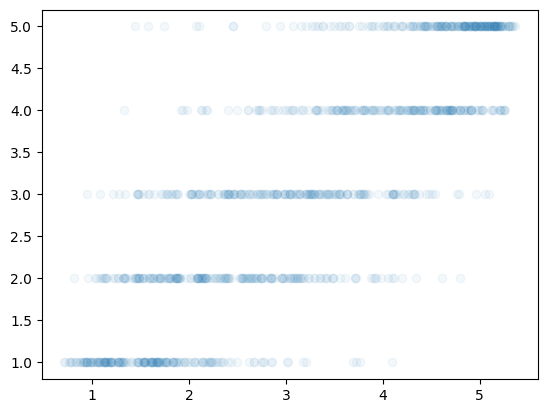

In [34]:
plt.scatter(preds_output.predictions+1, preds_output.label_ids+1, alpha=0.05)

{'whiskers': [<matplotlib.lines.Line2D at 0x7d2a80696fe0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d2a806973a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d2a80696ef0>,
 'medians': [<matplotlib.lines.Line2D at 0x7d2a80697af0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7d2a80697ca0>,
 'means': []}

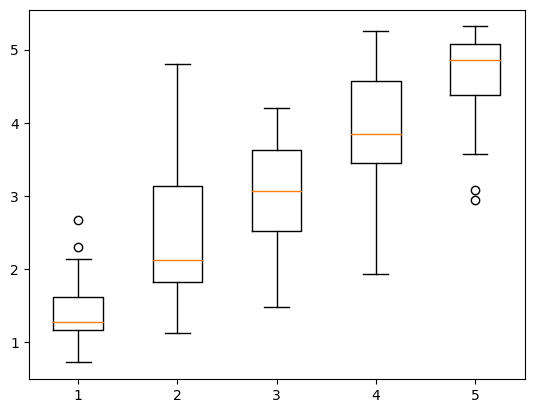

In [39]:
plt.boxplot(x)